In [1]:
import torch
import os, sys
import numpy as np
parent_dir = os.path.abspath('../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
os.environ['CUDA_VISIBLE_DEVICES']='2'

tensor(-2.3373e-05)


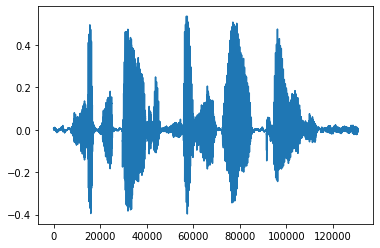

In [2]:
from util.util import compute_matrics,kbdwin
import torchaudio
import matplotlib.pyplot as plt
import torch
import torchaudio.functional as aF
audio_path = '/root/VCTK-Corpus/wav48/p227/p227_003.wav'
audio, fs = torchaudio.load(audio_path)
K = 50000
audio_seg = audio[...,K:130816+K].squeeze()
print(audio_seg.mean())
plt.plot(audio_seg)
plt.show()

torch.Size([512, 512])
cuda:0


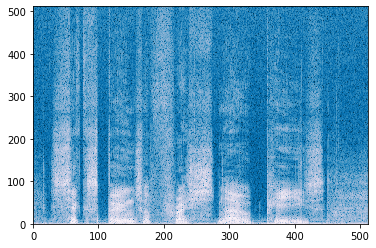

In [3]:
from models.mdct import MDCT2, IMDCT2
mdct2 = MDCT2(n_fft=512, hop_length=256, win_length=512, window=kbdwin, center=True)
spectro_2 = mdct2(audio_seg.cuda().squeeze(0)).permute(1,0)
spectro2 = aF.amplitude_to_DB((spectro_2.abs() + 1e-7),20,1e-7,1).squeeze(0)
print(spectro2.size())
print(spectro2.device)
sp_fig, sp_ax = plt.subplots()
sp_ax.pcolormesh(spectro2.cpu().numpy(), cmap='PuBu_r')
plt.show()

torch.Size([130816])
tensor(-2.3373e-05, device='cuda:0')


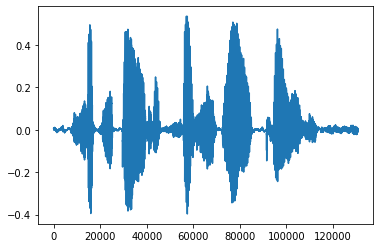

In [4]:
imdct2 = IMDCT2(n_fft=512, hop_length=256, win_length=512, window=kbdwin, center=True)
recover2 = imdct2(spectro_2.permute(1,0).unsqueeze(0).contiguous()).squeeze()
print(recover2.size())
print(recover2.mean())
plt.plot(recover2.cpu().numpy())
plt.show()

In [6]:
lr_audio = aF.resample(audio_seg,fs,fs/4)
lr_audio = aF.resample(lr_audio,fs/4,fs)
mse,snr_sr,snr_lr,_,_,_,lsd = compute_matrics(audio_seg.cpu(),lr_audio.cpu(),recover2.cpu())

In [8]:
print(snr_lr)
print(snr_sr)
print(mse)
print(lsd)

37.73739576339722
128.8947582244873
2.4056786022876725e-14
0.00023996879463084042
